# Лабораторная работа 4

### Вариант 13

Аминов С.С.
М8О-408Б-19

Целью работы является исследование свойств некоторых видов сетей с радиальными базисными элементами, алгоритмов обучения,а также применение сетей в задачах классификации и аппроксимации функции.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers
import tensorflow as tf

#### Классификация

In [2]:
def ellipse(t, a, b, x0, y0):
    x = x0 + a*np.cos(t)
    y = x0 + b*np.sin(t)
    return x, y

def parabola(t, p, x0, y0):
    x = x0 + t ** 2 / (2. * p)
    y = y0 + t
    return x, y

epochs = 500

In [3]:
t = np.linspace(0, 2*np.pi, 200)
x1, y1 = ellipse(t, 0.3, 0.3, 0, 0)

x2, y2 = ellipse(t, 0.7, 0.7, 0, 0)

x3, y3 = parabola(t, 1, -0.8, 0)

Описываемм класс RBF слоя

In [4]:
class RBF(layers.Layer):
    def __init__(self, units, **kwargs):
        self.units = units
        super(RBF, self).__init__(**kwargs)
        
    def build(self, input_shape):
        self.mu = self.add_weight(
            shape=(input_shape[1], self.units), initializer="random_normal", trainable=True
        )
        self.sigm = self.add_weight(
            shape=(self.units,) , initializer="random_normal", trainable=True
        )
        super().build(input_shape)
        
    def call(self, inputs):
        l_norm = tf.reduce_sum((tf.expand_dims(inputs, axis=2) - self.mu) ** 2, axis = 1)
        return tf.exp(l_norm*self.sigm)

(-1.7869604401089358, 19.92616924228765, -1.049136367826184, 6.632343482179861)

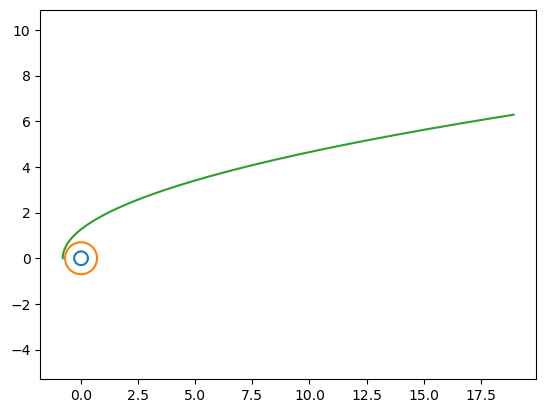

In [5]:
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.axis('equal')

Готовим датасет

In [6]:
data1 = [[cords, [1, 0, 0]] for cords in zip(x1, y1)]
data2 = [[cords, [0, 1, 0]] for cords in zip(x2, y2)]
data3 = [[cords, [0, 0, 1]] for cords in zip(x3, y3)]
dataset = data1 + data2 + data3
np.random.shuffle(dataset)

In [7]:
train_percent = 0.8
train_num = int(train_percent * len(dataset))
train_X = [x[0] for x in dataset[:train_num]]
train_y = [x[1] for x in dataset[:train_num]]
test_X = [x[0] for x in dataset[train_num:]]
test_y = [x[1] for x in dataset[train_num:]]

Создаем модель

In [8]:
model =  keras.Sequential([
    RBF(10,input_dim=2),
    layers.Dense(3,activation='sigmoid', name="sigmoid")
    ])

Компилируем модель

In [9]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

Тренеруем модель

In [10]:
hist = model.fit(train_X,train_y,batch_size=len(dataset)//10,epochs=epochs)

Epoch 1/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2863 - mae: 0.4873
Epoch 2/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2741 - mae: 0.4803
Epoch 3/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2595 - mae: 0.4736
Epoch 4/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2300 - mae: 0.4540
Epoch 5/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2154 - mae: 0.4379
Epoch 6/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2115 - mae: 0.4355
Epoch 7/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2092 - mae: 0.4335
Epoch 8/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2066 - mae: 0.4292
Epoch 9/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1997 - mae: 0.4214
Epoch 10/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1911 - mae: 0.4083
Epoch 11/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1846 

8/8 [==============================] - 0s 1ms/step - loss: 0.1076 - mae: 0.2633
Epoch 177/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1073 - mae: 0.2629
Epoch 178/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1070 - mae: 0.2625
Epoch 179/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1067 - mae: 0.2621
Epoch 180/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1065 - mae: 0.2617
Epoch 181/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1061 - mae: 0.2612
Epoch 182/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1059 - mae: 0.2607
Epoch 183/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1056 - mae: 0.2603
Epoch 184/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1053 - mae: 0.2599
Epoch 185/500
8/8 [==============================] - 0s 1000us/step - loss: 0.1050 - mae: 0.2594
Epoch 186/500
8/8 [==============================] - 0s 1ms/step - loss

8/8 [==============================] - 0s 1ms/step - loss: 0.0643 - mae: 0.1916
Epoch 351/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0642 - mae: 0.1913
Epoch 352/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0640 - mae: 0.1909
Epoch 353/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0638 - mae: 0.1906
Epoch 354/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0636 - mae: 0.1902
Epoch 355/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0634 - mae: 0.1898
Epoch 356/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0632 - mae: 0.1895
Epoch 357/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0631 - mae: 0.1891
Epoch 358/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0629 - mae: 0.1888
Epoch 359/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0627 - mae: 0.1884
Epoch 360/500
8/8 [==============================] - 0s 1ms/step - loss: 0

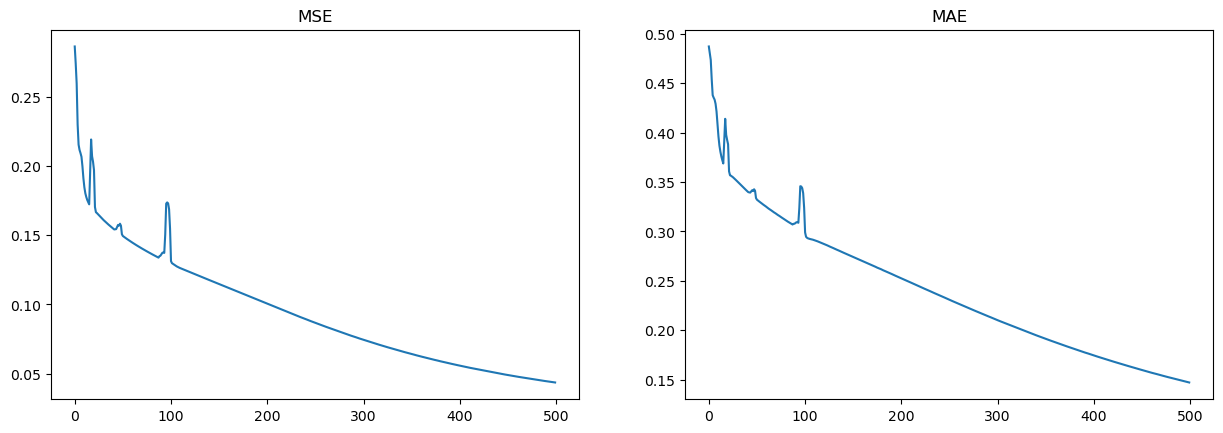

In [11]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)

ax[0].set_title('MSE')
ax[1].set_title('MAE')

ax[0].plot(range(epochs), hist.history['loss'])
ax[1].plot(range(epochs), hist.history['mae'])

Создаем поле точек и скалярное поле

In [12]:
pole = []
for y in np.linspace(-1,1,200):
    for x in np.linspace(-1,1,200):
        pole.append((x,y))

In [13]:
pred = model.predict(pole)
z = []
for i in range(200):
    z.append(pred[i*200: (i+1)*200])

1250/1250 [==============================] - 1s 711us/step


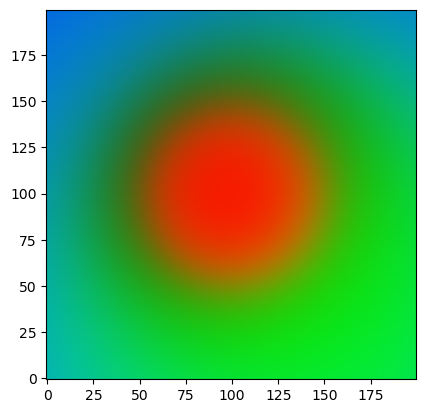

In [14]:
fig, ax = plt.subplots()
ax.imshow(z)
ax.invert_yaxis()

#### Аппроксимация функции

In [15]:
def func(t):
    return np.cos(t**2 - 2*t + 3)

In [16]:
h = 0.02
X = np.arange(0, 5+h,h)
y = func(X)

Создаем модель

In [38]:
model2 =  keras.Sequential([
        RBF(30,input_dim=1),
        layers.Dense(1,activation='linear', name='linear')
    ]
)

Компилируем модель

In [39]:
model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

Тренеруем модель

In [40]:
hist2 = model2.fit(X,y,batch_size=10,epochs=1000)

Epoch 1/1000
26/26 [==============================] - 0s 1ms/step - loss: 1.2307 - mae: 0.9917
Epoch 2/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.6073 - mae: 0.7103
Epoch 3/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3985 - mae: 0.5571
Epoch 4/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3683 - mae: 0.4971
Epoch 5/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3364 - mae: 0.4596
Epoch 6/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3387 - mae: 0.4579
Epoch 7/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3475 - mae: 0.4575
Epoch 8/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3189 - mae: 0.4478
Epoch 9/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3808 - mae: 0.4788
Epoch 10/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3234 - mae: 0.4527
Epoch 11/1000
26/26 [============================

26/26 [==============================] - 0s 1ms/step - loss: 0.3084 - mae: 0.4499
Epoch 171/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2973 - mae: 0.4424
Epoch 172/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3177 - mae: 0.4485
Epoch 173/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3069 - mae: 0.4468
Epoch 174/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2980 - mae: 0.4431
Epoch 175/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3182 - mae: 0.4578
Epoch 176/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2936 - mae: 0.4419
Epoch 177/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2950 - mae: 0.4425
Epoch 178/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2966 - mae: 0.4431
Epoch 179/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2948 - mae: 0.4420
Epoch 180/1000
26/26 [=======================

26/26 [==============================] - 0s 1ms/step - loss: 0.2697 - mae: 0.3951
Epoch 339/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2619 - mae: 0.3847
Epoch 340/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2650 - mae: 0.3872
Epoch 341/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2634 - mae: 0.3843
Epoch 342/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2626 - mae: 0.3843
Epoch 343/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2661 - mae: 0.3871
Epoch 344/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2661 - mae: 0.3877
Epoch 345/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2631 - mae: 0.3849
Epoch 346/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2632 - mae: 0.3865
Epoch 347/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2648 - mae: 0.3848
Epoch 348/1000
26/26 [=======================

26/26 [==============================] - 0s 1ms/step - loss: 0.2574 - mae: 0.3764
Epoch 507/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2528 - mae: 0.3726
Epoch 508/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2568 - mae: 0.3750
Epoch 509/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2520 - mae: 0.3731
Epoch 510/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2505 - mae: 0.3714
Epoch 511/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2503 - mae: 0.3708
Epoch 512/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2554 - mae: 0.3799
Epoch 513/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2516 - mae: 0.3729
Epoch 514/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2522 - mae: 0.3746
Epoch 515/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2501 - mae: 0.3688
Epoch 516/1000
26/26 [=======================

26/26 [==============================] - 0s 1ms/step - loss: 0.2403 - mae: 0.3541
Epoch 675/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2376 - mae: 0.3523
Epoch 676/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2387 - mae: 0.3522
Epoch 677/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2404 - mae: 0.3552
Epoch 678/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2386 - mae: 0.3521
Epoch 679/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2384 - mae: 0.3550
Epoch 680/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2414 - mae: 0.3571
Epoch 681/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2395 - mae: 0.3548
Epoch 682/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2383 - mae: 0.3558
Epoch 683/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2391 - mae: 0.3511
Epoch 684/1000
26/26 [=======================

26/26 [==============================] - 0s 2ms/step - loss: 0.2297 - mae: 0.3453
Epoch 843/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2302 - mae: 0.3463
Epoch 844/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2296 - mae: 0.3461
Epoch 845/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2287 - mae: 0.3436
Epoch 846/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2290 - mae: 0.3448
Epoch 847/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2302 - mae: 0.3475
Epoch 848/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2291 - mae: 0.3446
Epoch 849/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2293 - mae: 0.3440
Epoch 850/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2296 - mae: 0.3449
Epoch 851/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2314 - mae: 0.3473
Epoch 852/1000
26/26 [=======================

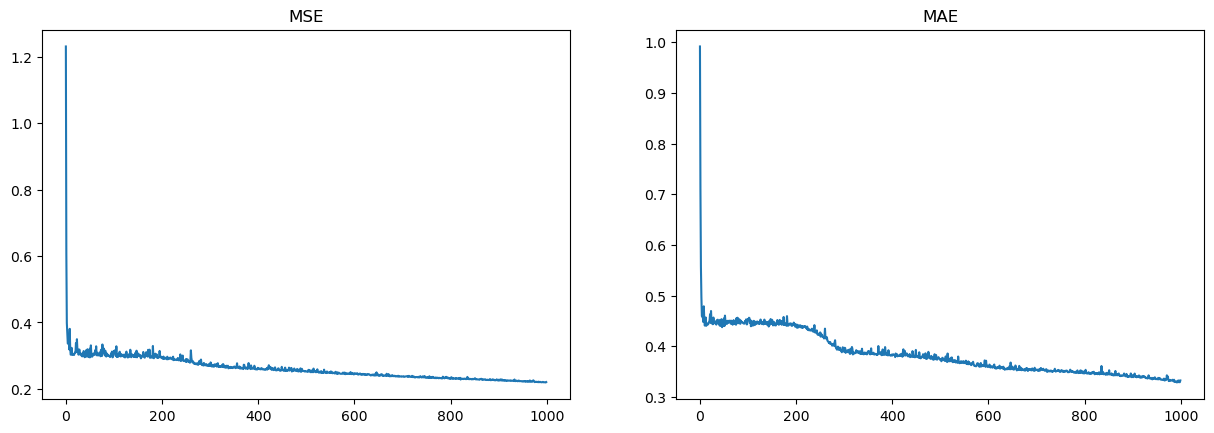

In [41]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)

ax[0].set_title('MSE')
ax[1].set_title('MAE')

ax[0].plot(range(1000), hist2.history['loss'])
ax[1].plot(range(1000), hist2.history['mae'])

Аппроксимируем функцию

63/63 [==============================] - 0s 790us/step


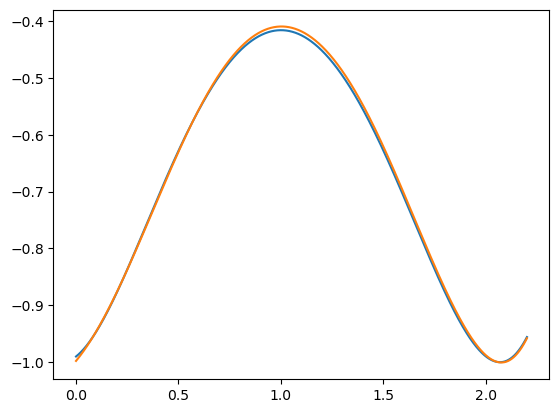

In [33]:
t = np.linspace(0, 2.2, 2000)
y_ans = func(t)
y_pred = model2.predict(t)
plt.plot(t, y_ans)
plt.plot(t, y_pred)